# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#to get current date
from datetime import datetime

#weather api link
weather_api_url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List rename

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#create data frame to store city names
city_df_col = ["Cities"]
city_name_df = pd.DataFrame(columns = city_df_col)

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#for each latitude, longitude find the city name
for lat_lng in lat_lngs:
    # Identify nearest city for each lat, lng combination for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
        
#check number of cities found
len(cities)

608

In [123]:
#creating a data frame from the cities list 
city_name_df["Cities"] = cities
city_name_df.head()

,Cities
0,tiksi
1,saint-philippe
2,hermanus
3,albany
4,faanui


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [130]:
#create a dataframe to store city and its weather data
city_weather_column_names = ["City", "Country","Temperature (F)", "Latitude",
                             "Longitude","Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
city_weather_df = pd.DataFrame(columns=df_column_names)

#counter for cities
city_row_count = 1

#print start of execution
print("Beginning Data Retrieval")
#loop to call weather api for each city
for index, row in city_name_df.iterrows():
    #setting target city for which data is retrieved
    target_city = row["Cities"]
    #Build query URL with each city
    weather_query_url = weather_api_url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    #sending request to weather api and storing the values in json format
    city_data = requests.get(weather_query_url).json()
    #condition to validate if city found
    if city_data["cod"] == "404":
        #city data not found
        print("City not found, skipping...")
    else:
        #city data found, store the data in the data frame
        city_weather_df.at[index, "City"] = city_data["name"]
        city_weather_df.at[index, "Country"] = city_data["sys"]["country"]
        city_weather_df.at[index, "Temperature (F)"] = city_data["main"]["temp"]
        city_weather_df.at[index, "Latitude"] = city_data["coord"]["lat"]
        city_weather_df.at[index, "Longitude"] = city_data["coord"]["lon"]
        city_weather_df.at[index, "Humidity (%)"] = city_data["main"]["humidity"]
        city_weather_df.at[index, "Cloudiness (%)"] = city_data["clouds"]["all"]
        city_weather_df.at[index, "Wind Speed (mph)"] = city_data["wind"]["speed"]
        #priting the output
        print("--------------------------------------------------")
        print("Proceesing: City # ", city_row_count, " | " , "City Name: ", city_data["name"])
        #incease city row count to keep track for next city
        city_row_count += 1

Beginning Data Retrieval
--------------------------------------------------
Proceesing: City #  1  |  City Name:  Tiksi
--------------------------------------------------
Proceesing: City #  2  |  City Name:  Saint-Philippe
--------------------------------------------------
Proceesing: City #  3  |  City Name:  Hermanus
--------------------------------------------------
Proceesing: City #  4  |  City Name:  Albany
--------------------------------------------------
Proceesing: City #  5  |  City Name:  Faanui
--------------------------------------------------
Proceesing: City #  6  |  City Name:  Carnarvon
--------------------------------------------------
Proceesing: City #  7  |  City Name:  Hithadhoo
--------------------------------------------------
Proceesing: City #  8  |  City Name:  Bluff
--------------------------------------------------
Proceesing: City #  9  |  City Name:  Anadyr
--------------------------------------------------
Proceesing: City #  10  |  City Name:  Vaini
-

--------------------------------------------------
Proceesing: City #  83  |  City Name:  Cochabamba
--------------------------------------------------
Proceesing: City #  84  |  City Name:  Tilichiki
--------------------------------------------------
Proceesing: City #  85  |  City Name:  Mar del Plata
--------------------------------------------------
Proceesing: City #  86  |  City Name:  Tura
--------------------------------------------------
Proceesing: City #  87  |  City Name:  Norman Wells
--------------------------------------------------
Proceesing: City #  88  |  City Name:  Gizo
--------------------------------------------------
Proceesing: City #  89  |  City Name:  Dakar
--------------------------------------------------
Proceesing: City #  90  |  City Name:  Taltal
--------------------------------------------------
Proceesing: City #  91  |  City Name:  Rayong
--------------------------------------------------
Proceesing: City #  92  |  City Name:  Bahile
City not found,

City not found, skipping...
--------------------------------------------------
Proceesing: City #  163  |  City Name:  Udachnyy
--------------------------------------------------
Proceesing: City #  164  |  City Name:  Thompson
--------------------------------------------------
Proceesing: City #  165  |  City Name:  Natal
--------------------------------------------------
Proceesing: City #  166  |  City Name:  Pisco
--------------------------------------------------
Proceesing: City #  167  |  City Name:  Itoman
--------------------------------------------------
Proceesing: City #  168  |  City Name:  Nicolas Bravo
City not found, skipping...
--------------------------------------------------
Proceesing: City #  169  |  City Name:  Dingle
--------------------------------------------------
Proceesing: City #  170  |  City Name:  Abalak
--------------------------------------------------
Proceesing: City #  171  |  City Name:  Manavalakurichi
--------------------------------------------

City not found, skipping...
--------------------------------------------------
Proceesing: City #  242  |  City Name:  Kikwit
--------------------------------------------------
Proceesing: City #  243  |  City Name:  Saldanha
--------------------------------------------------
Proceesing: City #  244  |  City Name:  Narsaq
City not found, skipping...
City not found, skipping...
--------------------------------------------------
Proceesing: City #  245  |  City Name:  Kamyshlov
--------------------------------------------------
Proceesing: City #  246  |  City Name:  Portland
--------------------------------------------------
Proceesing: City #  247  |  City Name:  Madison Heights
City not found, skipping...
--------------------------------------------------
Proceesing: City #  248  |  City Name:  Bilma
--------------------------------------------------
Proceesing: City #  249  |  City Name:  Kushima
--------------------------------------------------
Proceesing: City #  250  |  City Name

--------------------------------------------------
Proceesing: City #  320  |  City Name:  Cuyamel
--------------------------------------------------
Proceesing: City #  321  |  City Name:  Fare
--------------------------------------------------
Proceesing: City #  322  |  City Name:  Lata
--------------------------------------------------
Proceesing: City #  323  |  City Name:  La Asuncion
--------------------------------------------------
Proceesing: City #  324  |  City Name:  Chiredzi
--------------------------------------------------
Proceesing: City #  325  |  City Name:  Hami
--------------------------------------------------
Proceesing: City #  326  |  City Name:  Tessalit
--------------------------------------------------
Proceesing: City #  327  |  City Name:  Vestmannaeyjar
--------------------------------------------------
Proceesing: City #  328  |  City Name:  Ostrovnoy
--------------------------------------------------
Proceesing: City #  329  |  City Name:  Lebu
-------

--------------------------------------------------
Proceesing: City #  401  |  City Name:  Victoria
--------------------------------------------------
Proceesing: City #  402  |  City Name:  Igurubi
--------------------------------------------------
Proceesing: City #  403  |  City Name:  Beringovskiy
--------------------------------------------------
Proceesing: City #  404  |  City Name:  Ghatanji
--------------------------------------------------
Proceesing: City #  405  |  City Name:  Vila
--------------------------------------------------
Proceesing: City #  406  |  City Name:  General Roca
--------------------------------------------------
Proceesing: City #  407  |  City Name:  Mahajanga
--------------------------------------------------
Proceesing: City #  408  |  City Name:  Izumo
--------------------------------------------------
Proceesing: City #  409  |  City Name:  Batemans Bay
--------------------------------------------------
Proceesing: City #  410  |  City Name:  Grea

--------------------------------------------------
Proceesing: City #  481  |  City Name:  Haines Junction
--------------------------------------------------
Proceesing: City #  482  |  City Name:  Chortomlyk
--------------------------------------------------
Proceesing: City #  483  |  City Name:  Granadilla de Abona
City not found, skipping...
--------------------------------------------------
Proceesing: City #  484  |  City Name:  Dubbo
--------------------------------------------------
Proceesing: City #  485  |  City Name:  Fereydun Kenar
--------------------------------------------------
Proceesing: City #  486  |  City Name:  Avera
City not found, skipping...
--------------------------------------------------
Proceesing: City #  487  |  City Name:  Lubango
--------------------------------------------------
Proceesing: City #  488  |  City Name:  Kropotkin
--------------------------------------------------
Proceesing: City #  489  |  City Name:  Kotturu
-------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [131]:
#checking the number of count for each field
city_weather_df.count()

City                543
Country             543
Temperature (F)     543
Latitude            543
Longitude           543
Humidity (%)        543
Cloudiness (%)      543
Wind Speed (mph)    543
dtype: int64

In [132]:
#Confirm the city weather data frame
city_weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tiksi,RU,9.08,71.64,128.87,70,0,4.21
1,Saint-Philippe,CA,23.13,45.36,-73.48,49,1,10.29
2,Hermanus,ZA,71.76,-34.42,19.24,76,0,2.64
3,Albany,US,23,42.65,-73.75,45,1,3.36
4,Faanui,PF,84.41,-16.48,-151.75,100,8,4.76


In [133]:
# Save data to a CSV file
city_weather_df.to_csv("output/City_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

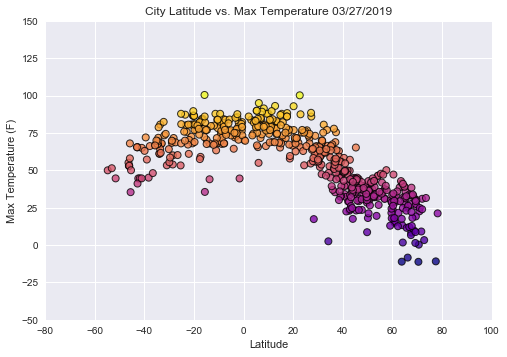

In [134]:
#Build a scatter plot for Latitude vs. Temperature
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Temperature (F)"], 
            c=city_weather_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", cmap='plasma', alpha=0.8) 

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 150])

# Save the figure
plt.savefig("output/Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

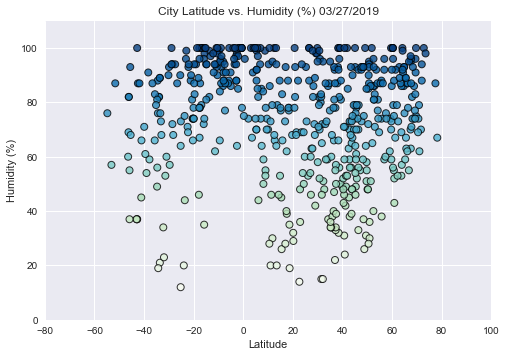

In [135]:
#Build a scatter plot for Latitude vs. Humidity (%)
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Humidity (%)"], 
            c=city_weather_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", cmap='GnBu', alpha=0.8)

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 110])

# Save the figure
plt.savefig("output/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

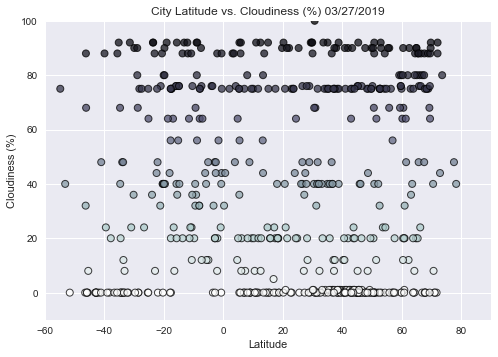

In [136]:
#Build a scatter plot for Latitude vs. Cloudiness (%)
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Cloudiness (%)"], 
            c = city_weather_df["Cloudiness (%)"],
            edgecolor = "black", linewidths=1, marker="o", cmap='bone_r', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-10, 100])

# Save the figure
plt.savefig("output/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

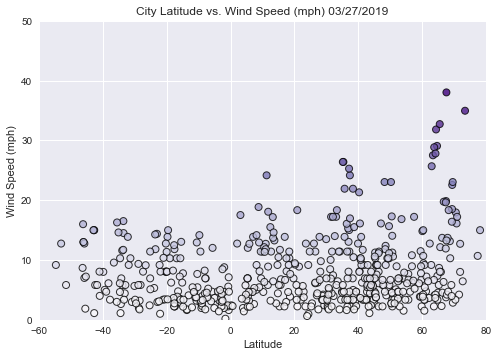

In [137]:
#Build a scatter plot for Latitude vs. Wind Speed (%)
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Wind Speed (mph)"], 
            c=city_weather_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", cmap='Purples', alpha=0.8)

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([0, 50])

# Save the figure
plt.savefig("output/Latitude_WindSpeed.png")

# Show plot
plt.show()